# Ch10 Constrained Optimization and Duality

## 10.1 Constrained Optimization

### 10.1.1 Equality Constrained Optimization

In [2]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [ ]:
# Problem
def f(x1, x2) :
    return 2*(x1**2) + x2**2

def g(x1) :
    return 1 - x1

In [4]:
# Solve with fmin_slsqp
def farray(x):
    return 2*x[0]**2 + x[1]**2

def eq_constraint(x):
    return x[0] + x[1] - 1

sp.optimize.fmin_slsqp(farray, np.array([1, 1]), eqcons=[eq_constraint])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6666666666666667
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4


array([0.33333333, 0.66666667])

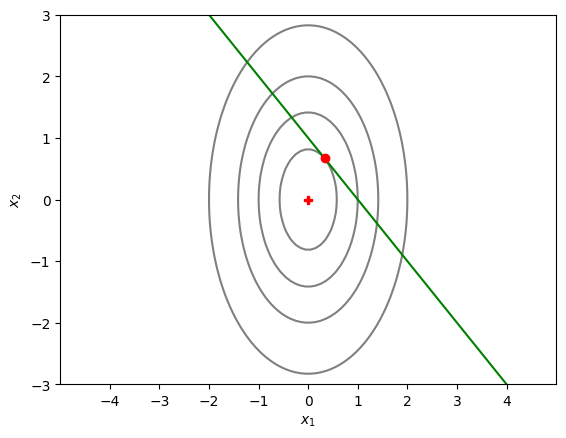

In [5]:
# Visualization
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f(X1, X2)

# constraint function g(x) = x1 + x2 - 1 = 0
x2_g = g(x1)

plt.contour(X1, X2, Y, colors="gray", levels=[2/3, 2, 4, 8])
plt.plot(x1, x2_g, 'g-')

plt.plot([0], [0], 'rP') # Zero
plt.plot([1/3], [2/3], 'ro') # Answer

plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [14]:
# Problem
f  = lambda x1,x2: 2*x1**2 + x2**2
h0 = lambda x1: 1 - x1                    

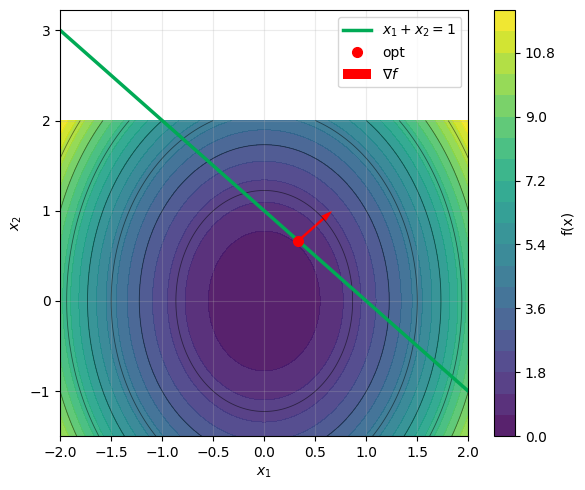

In [15]:
# Visualization
x1 = np.linspace(-2, 2, 301)
x2 = np.linspace(-1.5, 2.0, 301)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

fig, ax = plt.subplots(figsize=(6,5))
cf = ax.contourf(X1, X2, Z, levels=20, cmap='viridis', alpha=0.9)
cs = ax.contour (X1, X2, Z, levels=10, colors='k', linewidths=0.6, alpha=0.5)
fig.colorbar(cf, ax=ax, label="f(x)")

ax.plot(x1, h0(x1), color='#00AA55', lw=2.5, label=r"$x_1+x_2=1$")

x1_star, x2_star = 1/3, 2/3
ax.plot([x1_star], [x2_star], 'ro', ms=7, label="opt")

grad_f = np.array([4*x1_star, 2*x2_star])
grad_h = np.array([1.0, 1.0])

scale = 0.25 
ax.quiver(x1_star, x2_star, grad_f[0], grad_f[1], color='r', angles='xy', scale_units='xy', scale=1/scale, width=0.006, label=r'$\nabla f$')

ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.grid(alpha=0.25)
ax.legend(loc="upper right")
plt.tight_layout()
plt.show()

### 10.1.2 Inequality Constrained Optimization

In [ ]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [9]:
# Problem
def f(x1, x2):
    return (x1 - 2) ** 2 + 2*(x2 - 1) ** 2

def g1(x1):
    return (3-x1)/4

def g2(x1):
    return x1 

In [16]:
# Solve with fmin_slsqp
def farray(x):
    return (x[0] - 2) ** 2 + 2*(x[1] - 1) ** 2

def ieq_constraint1(x):
    return 3-(x[0]+4*x[1]) # >=0

def ieq_constraint2(x):
    return x[0]-x[1] # >=0

sp.optimize.fmin_slsqp(farray, np.array([0, 0]), ieqcons=[ieq_constraint1, ieq_constraint2])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9999999999999968
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4


array([1.66666667, 0.33333333])

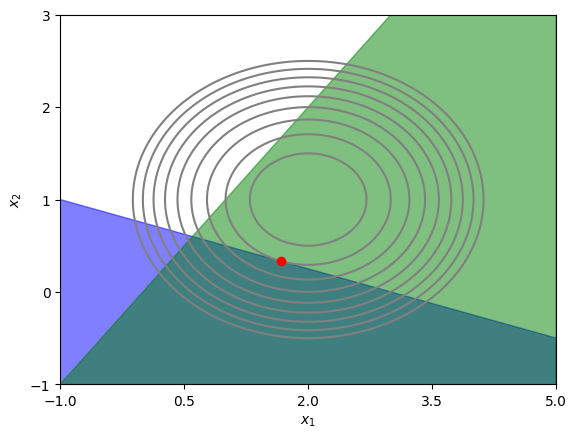

In [10]:
# Visualization
x1 = np.linspace(-2, 5, 100)
x2 = np.linspace(-1.5, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f(X1, X2)

x2_g1 = g1(x1)
x2_g2 = g2(x1)

plt.contour(X1, X2, Y, colors="gray",
            levels=np.arange(0, 5, 0.5))

plt.plot([5/3], [1/3], 'ro') # Answer

ax = plt.gca()
ax.fill_between(x1, x2_g1, -100, color='b', alpha=0.5)
ax.fill_between(x1, x2_g2, -100, color='g', alpha=0.5)

plt.xlim(-1, 5)
plt.ylim(-1, 3)
plt.xticks(np.linspace(-1, 5, 5))
plt.yticks(np.linspace(-1, 3, 5))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

## 10.2 The Lagrangian Duality

### 10.2.1 The Lagrangian Dual Problem

In [18]:
# Import library
import numpy as np
import matplotlib.pyplot as plt

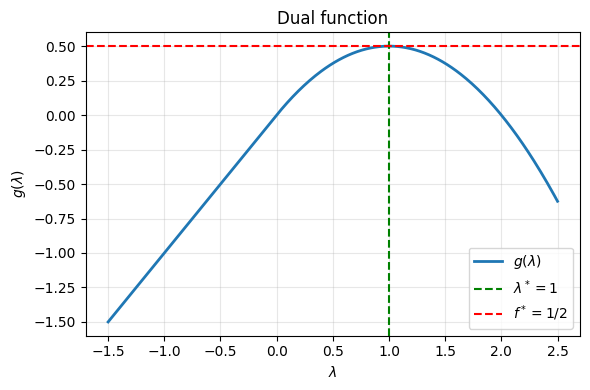

Dual maximizer λ* = 1.000,   g(λ*) = 0.500,   primal optimum f* = 0.500


In [42]:
# Primal optimum: x*=y*=1/2, f*=1/2
f_star = 0.5

def g_of_lambda(lam):
    # dual function g(λ) = inf_{x,y>=0} L(x,y,λ)
    if lam >= 0:  # unconstrained minimizer valid if λ ≥ 0
        x = y = lam/2
        return -(lam**2)/2 + lam
    else:         # if λ < 0, best is x=y=0
        return lam

# Evaluate g(λ) on grid
lams = np.linspace(-1.5, 2.5, 400)
g_vals = np.array([g_of_lambda(l) for l in lams])

lam_star = 1.0           # dual optimizer
g_star = g_of_lambda(lam_star)

# Plot dual function vs primal optimum
plt.figure(figsize=(6,4))
plt.plot(lams, g_vals, lw=2, label=r'$g(\lambda)$')
plt.axvline(lam_star, color='g', ls='--', label=r'$\lambda^* = 1$')
plt.axhline(f_star, color='r', ls='--', label=r'$f^* = 1/2$')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$g(\lambda)$')
plt.title('Dual function')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print results
print(f"Dual maximizer λ* = {lam_star:.3f},   g(λ*) = {g_star:.3f},   primal optimum f* = {f_star:.3f}")

### 10.2.2 Duality Theorem

In [ ]:
# primal solution (x*, y*) = (0.5, 0.5), f* = 0.5
x_star = np.array([0.5, 0.5])
f_val = x_star[0]**2 + x_star[1]**2

# dual solution λ* = 1 → g* = g(λ*)
lam_star = 1.0
g_val = g_of_lambda(lam_star)

# duality gap = f* - g* (≥ 0 always, =0 if strong duality holds)
gap = f_val - g_val

# print results
print(f"Primal optimum f*  = {f_val:.6f}")
print(f"Dual optimum  g*   = {g_val:.6f}")
print(f"Duality gap        = {gap:.2e}")

Primal optimum f*  = 0.500000
Dual optimum  g*   = 0.500000
Duality gap        = 0.00e+00


### 10.2.3 Convex Optimization and Duality

In [ ]:
# Import library
import numpy as np

In [40]:
# small positive-definite H, equality Ax=b
H = np.array([[2.0, 0.2],
              [0.2, 1.0]])
d = np.array([-1.0, 0.5])
A = np.array([[1.0, 1.0]])   # constraint: x1 + x2 = 1
b = np.array([1.0])

# primal KKT: Hx + d + A^T λ = 0,  Ax=b
# eliminate x: x(λ) = -H^{-1}(d + A^T λ)
Hinv = np.linalg.inv(H)
M = A @ Hinv @ A.T
rhs = A @ Hinv @ d + b
lam_star = - np.linalg.solve(M, rhs)   # solve for λ*
x_star = - Hinv @ (d + A.T @ lam_star)

# primal objective value
f_primal = 0.5 * x_star @ H @ x_star + d @ x_star

# dual objective value at λ*
dual_val = -0.5 * (d + A.T @ lam_star).T @ Hinv @ (d + A.T @ lam_star) - b @ lam_star

# results
print("Primal solution")
print(f"  x*   = [{x_star[0]:.4f}, {x_star[1]:.4f}]")
print(f"  f(x*)= {f_primal:.6f}")

print("\nDual solution")
print(f"  λ*   = {lam_star.ravel()[0]:.6f}")
print(f"  D(λ*)= {dual_val:.6f}")

gap = abs(f_primal - dual_val)
print(f"\nDuality gap = {gap:.2e} ")

Primal solution
  x*   = [0.8846, 0.1154]
  f(x*)= -0.017308

Dual solution
  λ*   = -0.792308
  D(λ*)= -0.017308

Duality gap = 1.11e-16 
